In [6]:
import pandas as pd    
pixel = pd.read_csv('./graphs/samples_pixel.csv', sep=";")
neighbor = pd.read_csv('./graphs/samples_neighbor.csv', sep=";")
pixel, neighbor

(      x         y
 0     1  17.80806
 1     6  17.86588
 2    11  17.97821
 3    16  18.00214
 4    21  18.44363
 5    26  19.15524
 6    31  19.67431
 7    36  20.53596
 8    41  22.15505
 9    46  22.90247
 10   51  24.68429
 11   56  26.23478
 12   61  26.83111
 13   66  27.78110
 14   71  29.03347
 15   76  30.40391
 16   81  32.01854
 17   86  33.38907
 18   91  34.96265
 19   96  36.13718
 20  101  37.47708,
       x         y
 0     1  17.86396
 1     6  17.92471
 2    11  18.03541
 3    16  18.05803
 4    21  18.50211
 5    26  19.21889
 6    31  19.74313
 7    36  20.60758
 8    41  22.23652
 9    46  22.99149
 10   51  24.77581
 11   56  26.32300
 12   61  26.92355
 13   66  27.87409
 14   71  29.12496
 15   76  30.50049
 16   81  32.11033
 17   86  33.48658
 18   91  35.06147
 19   96  36.24308
 20  101  37.58859)

In [3]:
pixel_fps = pixel.copy()
pixel_fps.y = 1000 / pixel_fps.y

neighbor_fps = neighbor.copy()
neighbor_fps.y = 1000 / neighbor_fps.y

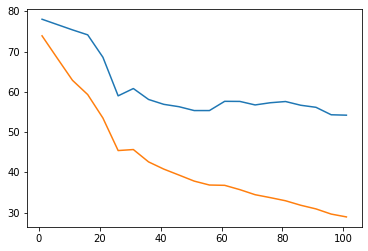

In [4]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(pixel.x, pixel_fps.y, label="blur 1")
plt.plot(neighbor.x, neighbor_fps.y, label="blur 2")

In [5]:
pd.DataFrame(pixel_fps).to_csv('./graphs/fps_pixel.csv', sep=";", encoding='utf-8')
pd.DataFrame(neighbor_fps).to_csv('./graphs/fps_neighbor.csv', sep=";", encoding='utf-8')

In [120]:
import scipy
import scipy.interpolate as inter
import scipy.optimize as opt

def aprox(data):
    def mapping(x, a, b, c): 
        return a * x + c *x*x + b


    mm, _ = opt.curve_fit(mapping, data.x, data.y)

    a,b,c = mm

    mapping(mm, a, b, c)


    approximated = data.copy()
    approximated.y = mapping(data.x, a, b, c)

    # plt.plot(pixel.x, pixel.y, label="blur 1")

    # plt.plot(approximated.x, approximated.y, label="blur 1")

    dy = approximated.y - data.y
    # plt.plot(approximated.x, dy, label="blur 1")

    dy /= 3

    # plt.plot(approximated.x, dy, label="blur 1")

    nn = data.y + dy 

    # plt.plot(approximated.x, nn, label="blur 1")

    return nn

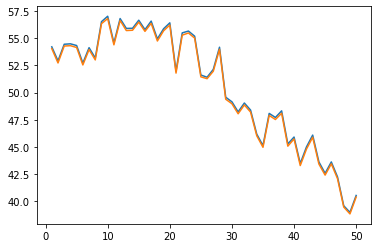

In [128]:
plt.plot(pixel.x[0:50], (1000 / pixel.y)[0:50], label="blur 1")
plt.plot(neighbor.x[0:50], (1000 / neighbor.y)[0:50], label="blur 2")